## Download Images from Google Images into 2 categories

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import os
import shutil
from google_images_download import google_images_download
#readme for goolge_images_download https://github.com/hardikvasa/google-images-download
categories = ['monkey','giraffe']
base_dir = "../week1/data/"
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)

In [5]:
def download_images(category):
    arguments={}
    arguments['keywords'] = category
    arguments['limit'] = 5
    arguments['format'] = "jpg"
    arguments['size'] = "medium"
    arguments['output_directory'] = base_dir
    arguments['image_directory'] = category
    arguments['print_urls'] = False
    response = google_images_download.googleimagesdownload()
    absolute_image_paths = response.download(arguments)

In [6]:
for category in categories:
    download_images(category)


Item no.: 1 --> Item name = monkey
Evaluating...
Starting Download...
Completed Image ====> 1. _96317895_gettyimages-164067218.jpg
Completed Image ====> 2. axgpay.jpg
Completed Image ====> 3. photo-1531989417401-0f85f7e673f8?ixlib=rb-0.3.5&ixid=eyjhchbfawqiojeymdd9&s=30d7d233aa50c5dd01fde6568cda78ea&w=1000&q=80.jpg
Completed Image ====> 4. monkey-selfie.jpg
Completed Image ====> 5. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlza5os8zmjkvb3jpz2luywwvy2hpbxbzlwvhdc1tb25rzxktynjhaw5zltax.jpg

Errors: 0


Item no.: 1 --> Item name = giraffe
Evaluating...
Starting Download...
Completed Image ====> 1. giraffe_10.jpg
Completed Image ====> 2. giraffe-facts-1.jpg
Completed Image ====> 3. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlza2oc8wotuvb3jpz2luywwvz2lyywzmzs5qcgc=.jpg
Completed Image ====> 4. 41evpa0n7zl._sy450_.jpg
Completed Image ====> 5. 75855-004-7cb8c9f0.jpg

Errors: 0



In [7]:
def get_file_list_from_dir(datadir):
    all_files = os.listdir(os.path.abspath(datadir))
    filtered_files = list(filter(lambda file: file.endswith('.jpg'), all_files))
    return filtered_files

In [8]:
category_1_all = get_file_list_from_dir(os.path.join(base_dir,categories[0]))
category_2_all = get_file_list_from_dir(os.path.join(base_dir,categories[1]))
print (len(category_1_all),category_1_all[:5])
print (len(category_2_all),category_2_all[:5])

5 ['2. axgpay.jpg', '3. photo-1531989417401-0f85f7e673f8?ixlib=rb-0.3.5&ixid=eyjhchbfawqiojeymdd9&s=30d7d233aa50c5dd01fde6568cda78ea&w=1000&q=80.jpg', '5. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlza5os8zmjkvb3jpz2luywwvy2hpbxbzlwvhdc1tb25rzxktynjhaw5zltax.jpg', '4. monkey-selfie.jpg', '1. _96317895_gettyimages-164067218.jpg']
5 ['1. giraffe_10.jpg', '2. giraffe-facts-1.jpg', '3. ahr0cdovl3d3dy5saxzlc2npzw5jzs5jb20vaw1hz2vzl2kvmdawlza2oc8wotuvb3jpz2luywwvz2lyywzmzs5qcgc=.jpg', '4. 41evpa0n7zl._sy450_.jpg', '5. 75855-004-7cb8c9f0.jpg']


## Split the downloaded images into train and valid folders
## using sklearn.model_selection train_test_split() method

In [9]:
from sklearn.model_selection import *

In [10]:
cat_1_train, cat_1_valid, cat_2_train, cat_2_valid = train_test_split(category_1_all,category_2_all,test_size=0.30)
print (len(cat_1_train),len(cat_1_valid),len(cat_2_train),len(cat_2_valid))

3 2 3 2


In [11]:
def copy_files(srcfolder, destfolder, fileList):
    if not os.path.exists(destfolder):
        os.makedirs(destfolder)
    else:
        shutil.rmtree(destfolder)
        os.makedirs(destfolder)    
    for file in fileList:
        shutil.copy(os.path.join(srcfolder,file),destfolder)

In [12]:
copy_files(os.path.join(base_dir,categories[0]),os.path.join(base_dir,"train",categories[0]),cat_1_train)
copy_files(os.path.join(base_dir,categories[0]),os.path.join(base_dir,"valid",categories[0]),cat_1_valid)
copy_files(os.path.join(base_dir,categories[1]),os.path.join(base_dir,"train",categories[1]),cat_2_train)
copy_files(os.path.join(base_dir,categories[1]),os.path.join(base_dir,"valid",categories[1]),cat_2_valid)

## Deeplearning using fastai starts from here

In [13]:
#from fastai.imports import *
#from fastai.transforms import *
#from fastai.conv_learner import *
#from fastai.model import *
#from fastai.dataset import *
#from fastai.sgdr import *
#from fastai.plots import *
import matplotlib.pyplot as plt

In [14]:
PATH=base_dir
sz=224
print (PATH)

../week1/data/


In [15]:
torch.cuda.is_available()

NameError: name 'torch' is not defined

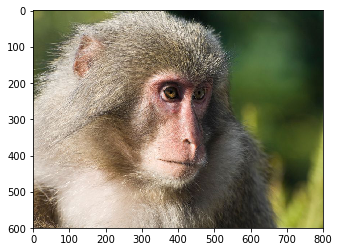

In [16]:
img_monkey = plt.imread(f'{PATH}train/monkey/{cat_1_train[0]}')
plt.imshow(img_monkey);

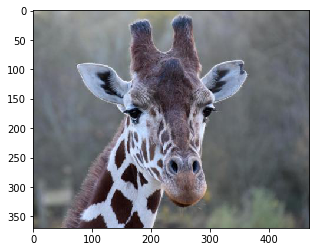

In [17]:
img_giraffe = plt.imread(f'{PATH}train/giraffe/{cat_2_train[0]}')
plt.imshow(img_giraffe);

In [18]:
print(img_monkey.shape)
print(img_monkey[:2,:2])
print(img_giraffe.shape)
print(img_giraffe[:2,:2])

(600, 800, 3)
[[[134 135  65]
  [134 135  65]]

 [[134 135  65]
  [134 135  65]]]
(370, 470, 3)
[[[181 178 173]
  [183 180 175]]

 [[178 175 170]
  [179 176 171]]]


In [19]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

NameError: name 'resnet50' is not defined